# The Kardasian-Jenner sisters and Google Trends
<p>While I'm not a fan nor a hater of the Kardashians and Jenners, the polarizing family intrigues me. Why? Their marketing prowess. Say what you will about them and what they stand for, they are great at the hype game. Everything they touch turns to content.</p>
<p>The sisters in particular over the past decade have been especially productive in this regard. Let's get some facts straight. I consider the "sisters" to be the following daughters of Kris Jenner. Three from her first marriage to lawyer <a href="https://en.wikipedia.org/wiki/Robert_Kardashian">Robert Kardashian</a>:</p>
<ul>
<li><a href="https://en.wikipedia.org/wiki/Kourtney_Kardashian">Kourtney Kardashian</a> (daughter of Robert Kardashian, born in 1979)</li>
<li><a href="https://en.wikipedia.org/wiki/Kim_Kardashian">Kim Kardashian</a> (daughter of Robert Kardashian, born in 1980)</li>
<li><a href="https://en.wikipedia.org/wiki/Khlo%C3%A9_Kardashian">Khloé Kardashian</a> (daughter of Robert Kardashian, born in 1984)</li>
</ul>
<p>And two from her second marriage to Olympic gold medal-winning decathlete, <a href="https://en.wikipedia.org/wiki/Caitlyn_Jenner">Caitlyn Jenner</a> (formerly Bruce):</p>
<ul>
<li><a href="https://en.wikipedia.org/wiki/Kendall_Jenner">Kendall Jenner</a> (daughter of Caitlyn Jenner, born in 1995)</li>
<li><a href="https://en.wikipedia.org/wiki/Kylie_Jenner">Kylie Jenner</a> (daughter of Caitlyn Jenner, born in 1997)</li>
</ul>
<p><img src="https://assets.datacamp.com/production/project_538/img/kardashian_jenner_family_tree.png" alt="Kardashian Jenner sisters family tree"></p>
<p>This family tree can be confusing, but we aren't here to explain it. We're here to explore the data underneath the hype, and we'll do it using search interest data from Google Trends. We'll recreate the Google Trends plot to visualize their ups and downs over time, then make a few custom plots of our own. And we'll answer the big question: <strong>is Kim even the most famous sister anymore?</strong></p>
<p>First, let's load and inspect our Google Trends data, which was downloaded in CSV form. The <a href="https://trends.google.com/trends/explore?date=2007-01-01%202021-11-20&q=%2Fm%2F0261x8t,%2Fm%2F043p2f2,%2Fm%2F043ttm7,%2Fm%2F05_5_yx,%2Fm%2F05_5_yh">query</a> parameters: each of the sisters, worldwide search data, 2007 to present day. (2007 was the year Kim became "active" according to Wikipedia.)</p>

# Importing libraries and dataset

In [ ]:
import pandas as pd
import numpy as np
import datetime
import matplotlib. pyplot as plt

In [2]:
# Read in dataset
trends = pd.read_csv('datasets/kardashian_latest.csv')

trends.head()

,Month,Kim Kardashian: (Worldwide),Khloe Kardashian: (Worldwide),Kourtney Kardashian: (Worldwide),Kendall Jenner: (Worldwide),Kylie Jenner: (Worldwide)
0,2007-01,2,<1,<1,<1,2
1,2007-02,12,<1,<1,<1,1
2,2007-03,9,<1,<1,<1,1
3,2007-04,6,<1,<1,<1,1
4,2007-05,6,<1,<1,<1,1


So we have a column for each month since January 2007 and a column for the worldwide search interest for each of the sisters each month. By the way, Google defines the values of search interest as:
<blockquote>
<p>Numbers represent search interest relative to the highest point on the chart for the given region and time. A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular. A score of 0 means there was not enough data for this term.</p>
    </blockquote>
    
 Okay, that's great Google, but you are not making this data easily analyzable for us.

# Data Cleaning

In [3]:
# Make column names easier to work with
trends.columns = ['month', 'kim', 'khloe', 'kourtney', 'kendall', 'kylie']

# Inspect data
trends.head()

,month,kim,khloe,kourtney,kendall,kylie
0,2007-01,2,<1,<1,<1,2
1,2007-02,12,<1,<1,<1,1
2,2007-03,9,<1,<1,<1,1
3,2007-04,6,<1,<1,<1,1
4,2007-05,6,<1,<1,<1,1


The next thing I see that is going to be an issue is that "<" sign. If "a score of 0 means there was not enough data for this term," "<1" must mean it is between 0 and 1 and Google does not want to give us the fraction from google.trends.com for whatever reason. That's fine, but this "<" sign means we won't be able to analyze or visualize our data right away because those column values aren't going to be represented as numbers in our data structure. Let's confirm that by inspecting our data types.

In [4]:
trends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   month     179 non-null    object
 1   kim       179 non-null    int64 
 2   khloe     179 non-null    object
 3   kourtney  179 non-null    object
 4   kendall   179 non-null    object
 5   kylie     179 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 8.5+ KB


Khloe, kourtney, and kendall columns aren't integers like the kim and kylie columns are because of the "<" sign that indicates a search interest value between zero and one

In [5]:
for trend in trends.columns:
    if "<" in trends[trend].to_string():
        trends[trend] = trends[trend].str.replace("<", "")c #replacing the <
        trends[trend] = pd.to_numeric(trends[trend]) #convert to numeric

# Inspect data types and data
trends.info()
trends.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   month     179 non-null    object
 1   kim       179 non-null    int64 
 2   khloe     179 non-null    int64 
 3   kourtney  179 non-null    int64 
 4   kendall   179 non-null    int64 
 5   kylie     179 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 8.5+ KB


,month,kim,khloe,kourtney,kendall,kylie
0,2007-01,2,1,1,1,2
1,2007-02,12,1,1,1,1
2,2007-03,9,1,1,1,1
3,2007-04,6,1,1,1,1
4,2007-05,6,1,1,1,1


Okay, great, no more "<" signs. All the sister columns are of integer type.

Now let's convert our month column from type object to datetime to make our date data more accessible.

In [6]:
trends['month'] = pd.to_datetime(trends['month']) #get the month 
trends.info()
trends.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   month     179 non-null    datetime64[ns]
 1   kim       179 non-null    int64         
 2   khloe     179 non-null    int64         
 3   kourtney  179 non-null    int64         
 4   kendall   179 non-null    int64         
 5   kylie     179 non-null    int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 8.5 KB


,month,kim,khloe,kourtney,kendall,kylie
0,2007-01-01,2,1,1,1,2
1,2007-02-01,12,1,1,1,1
2,2007-03-01,9,1,1,1,1
3,2007-04-01,6,1,1,1,1
4,2007-05-01,6,1,1,1,1


Let's set the month column as our index to wrap our data cleaning.

In [7]:
# Set month as DataFrame index
trends = trends.set_index('month') #setting month as index

# Inspect the data
trends.head()

,kim,khloe,kourtney,kendall,kylie
month,,,,,
2007-01-01,2,1,1,1,2
2007-02-01,12,1,1,1,1
2007-03-01,9,1,1,1,1
2007-04-01,6,1,1,1,1
2007-05-01,6,1,1,1,1


# EDA

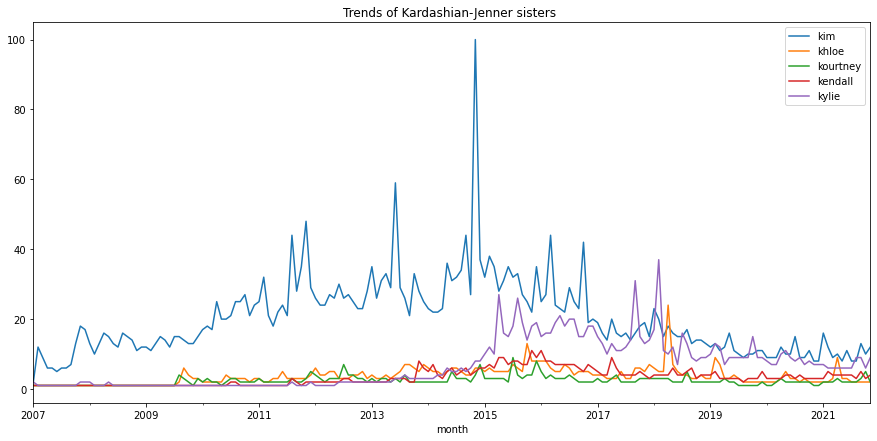

In [8]:
trends.plot(title='Trends of Kardashian-Jenner sisters ',figsize=(15,7));

Kim's sharp rise <a href="https://en.wikipedia.org/wiki/Kim_Kardashian#2007%E2%80%932009:_Breakthrough_with_reality_television">sharp rise in 2007</a>, with the beginning of Keeping Up with the Kardashians. There was not much significant search interest of other sisters until mid 2009 where Kourtney and Khloe launch the reality television series, <a href="https://en.wikipedia.org/wiki/Kourtney_and_Kim_Take_Miami">Kourtney and Khloé Take Miami</a>. At year 2014, there a significant rise again in Dec 2014 for posing naked in the cover of Paper Magazine to break the internet.

However, kim has not always been the popular sister. There seems to have a spike in kylie jenner after 2014 and we will look further to that in the next graph.

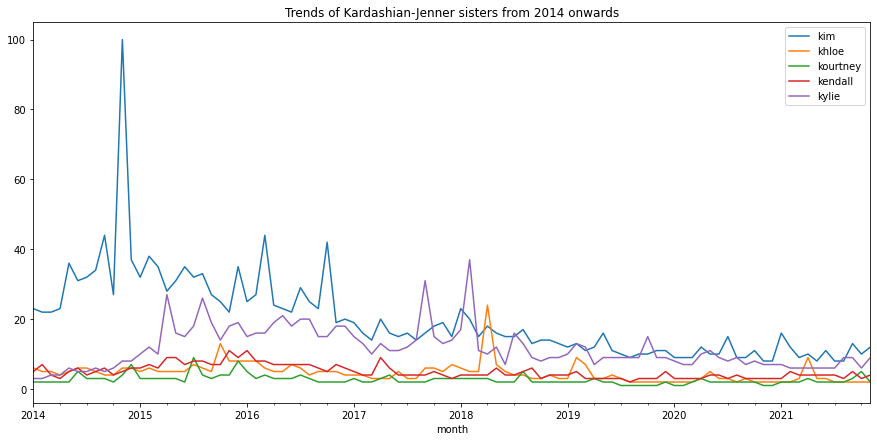

In [9]:
trends.loc['2014-01-01':].plot(title='Trends of Kardashian-Jenner sisters from 2014 onwards',figsize=(15,7));

A spike of Kylie Jenner occurs after late 2014 where she started to launch her make up kits. Around mid 2017 is where she starts to take over Kim in various months due to her expecting her first child and also at 2018 where she gave birth to her first daughter, Stormi Webster. The continued success of her Kylie Cosmetics has kept her in the news and " The youngest Self Made Billionaire Ever"<a href="https://www.forbes.com/sites/natalierobehmed/2019/03/05/at-21-kylie-jenner-becomes-the-youngest-self-made-billionaire-ever/#57e612c02794">according to Forbes</a>.</p>

<p>These fluctuations are descriptive but do not really help us answer our question: is Kim even the most famous sister anymore? We can use rolling means to smooth out short-term fluctuations in time series data and highlight long-term trends. Let's make the window twelve months a.k.a. one year.</p>

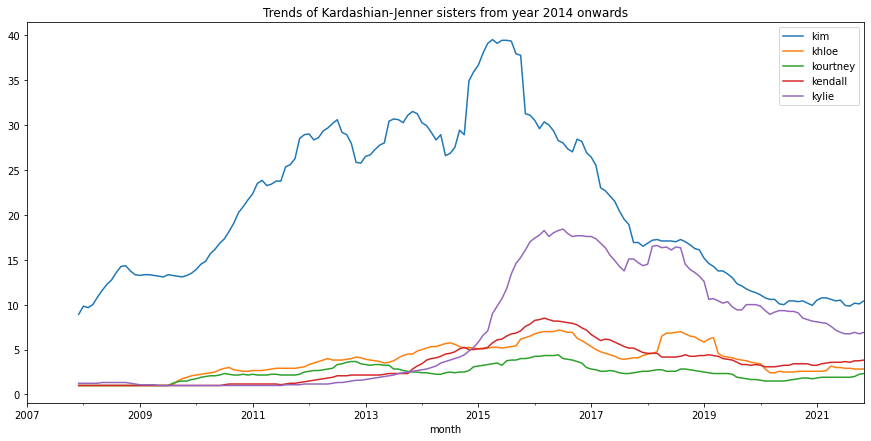

In [10]:
trends.rolling(window=12).mean().plot(title='Trends of Kardashian-Jenner sisters from year 2014 onwards',figsize=(15,7));

Ok so by metric, Kim is the most famous sister despite kylie being close and nearly taking hew crown.

Honestly, the biggest takeaway from this whole exercise might be Kendall not showing up that much. It makes sense, though, despite her <a href="http://time.com/money/5033357/kendall-jenner-makes-more-than-gisele-bundchen/">wildly successful modeling career</a>. Some have called her "<a href="https://www.nickiswift.com/5681/kendall-jenner-normal-one-family/">the only normal one in her family</a>" as she tends to shy away from the more dramatic and controversial parts of the media limelight that generate oh so many clicks.</p>

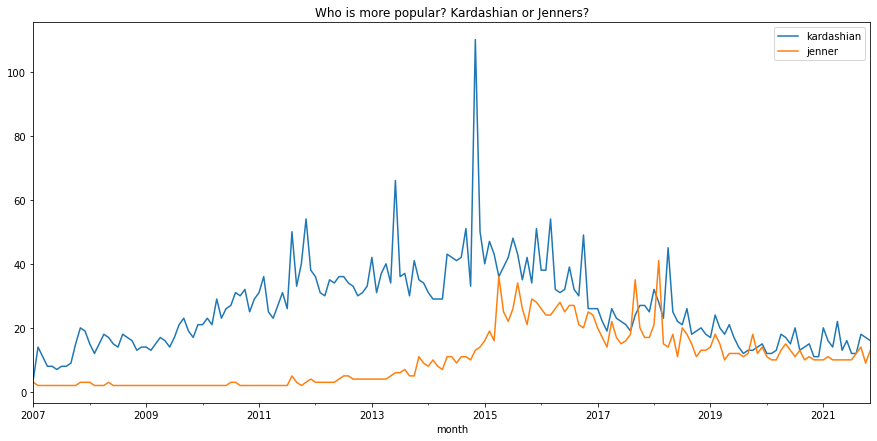

In [11]:
trends['kardashian'] = trends.kim + trends.khloe + trends.kourtney #combine all kadashian to one
trends['jenner'] =  trends.kendall + trends.kylie #combine all jenner as one
trends[['kardashian', 'jenner']].plot(title='Who is more popular? Kardashian or Jenners?',figsize=(15,7));

<p><strong>The answer?</strong> Since 2015, it has been a toss-up. Karadshian sisters tend to be more popular in general, but jenner sisters are slowly catching up.
    
 And in the future? With this family and their penchant for big events, who knows?</p>